## Projekt Analiza i wizualizacja danych
### Politechnika Świętokrzyska, wydział Elektrotechniki Automatyki i Informatyki
#### Studia niestacjonarne, kierunek informatyka 2022/2023 2IZ21A
#### Grupa Przemysław Postrach, Piotr Kaczmarczyk

Przykładowe dane wykorzystane w projekcie zostały pobrane ze strony kaggle.com jest to zbiór danych na temat wynagrodzeń osób pracujących w różnych wydziałach sektora publicznego, zbiór danych zawiera informacje na temat danych takich jak wynagrodzenie podstawowe, wynagrodzenie za nadgodziny, dodatki, premie, oraz suma wynagrodzenia. (https://www.kaggle.com/datasets/bf0d8d6198ad19892386db65f867cc2ff9f4ac23bd4bb5decc3ccae8aca51a2b?resource=download) Dane zostały pobrane w formacie csv i umieszczone w repozytorium.

W projekcie zostały wykorzystane biblioteki
- pandas
- numpy
- sklearn
- matplotlib
- seaborn

Import bibliotek oraz załadowanie ramki danych biblioteki pandas z pliku .csv umieszczonego w projekcie. Wyświetlenie parametrów statystycznych dla danych.

In [452]:
import pandas as pd
import numpy as np

df = pd.DataFrame(pd.read_csv('../data/SanFrancisco_salary_dirty.csv'),
                  columns=['JobTitle', 'Department', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay'])

df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay
count,111881.000000,111881.000000,111881.000000,111881.000000,111881.000000
mean,67208.464335,5266.537354,3655.130550,25114.682525,76130.132232
std,43417.695515,11764.757612,8038.765165,15372.746237,51269.839386
min,-166.010000,-0.010000,0.000000,-13.800000,0.000000
25%,33644.660156,0.000000,0.000000,12145.089844,37041.430000
50%,65547.040000,0.000000,820.840000,28698.490234,72630.700000
75%,95229.030000,4865.720000,4307.970215,35608.770000,107533.480000
max,319275.010000,220909.480000,342802.630000,96570.660000,471952.640000


W danych występowały błędne rekordy, które należało skorygować.
- Płatność za nadgodziny nie może być mniejsza od 0, dla takich rekordów ustawiamy 0
- Premia nie może być mniejsza od 0, dla takich rekordów ustawiamy 0
- Płaca bazowa nie może być mniejsza od minimalnej płacy, dla takich rekordów ustawiamy średnią wydziału
- Przeliczamy sumę wynagrodzeń

Tak poprawione dane zostały zapisane do pliku SanFrancisco_salary_clean.csv

In [453]:
df = pd.DataFrame(pd.read_csv('../data/SanFrancisco_salary_dirty.csv', delimiter=','),
                  columns=['JobTitle', 'Department', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay'])

df[df.OvertimePay < 0] = 0
df[df.Benefits < 0] = 0
df = df[df.Department != 0]

all_depts = df['Department'].unique()
for dept in all_depts:
    dept_mean = df[(df.Department == dept) & (df.BasePay >= 12 * 2720)]['BasePay'].mean()
    df.loc[(df.Department == dept) & (df.BasePay < 12 * 2720), 'BasePay'] = dept_mean

df['TotalPay'] = df.apply(lambda row: row['BasePay'] + row['OvertimePay'] + row['OtherPay'] + row['Benefits'], axis=1)

df.to_csv('../data/SanFrancisco_salary_clean.csv', index=False)
df.describe()


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay
count,111879.000000,111879.000000,111879.000000,111879.000000,111879.000000
mean,85482.970594,5266.631501,3655.092817,25114.873611,119519.568523
std,29265.204602,11764.841695,8038.812208,15372.695982,46195.387337
min,32640.300000,0.000000,0.000000,0.000000,33044.390000
25%,65400.405000,0.000000,0.000000,12145.370117,86032.293025
50%,82697.748853,0.000000,820.790000,28698.490234,103694.440000
75%,95229.030000,4865.870000,4307.550049,35608.775000,143171.180000
max,319275.010000,220909.480000,342802.630000,96570.660000,510732.680000


Wyświetlony został kwantyl 0.1

In [454]:
df.quantile(0.1)

/var/folders/r7/kp46shb15q31g148xwp091jh0000gn/T/ipykernel_7408/3987576084.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.1)


BasePay        52168.714000
OvertimePay        0.000000
OtherPay           0.000000
Benefits         206.239999
TotalPay       80702.434000
Name: 0.1, dtype: float64

Wyświetlony został kwantyl 0.1

In [455]:
df.quantile(0.9)

/var/folders/r7/kp46shb15q31g148xwp091jh0000gn/T/ipykernel_7408/248432318.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.9)


BasePay        122621.030
OvertimePay     16912.912
OtherPay        10767.294
Benefits        41598.390
TotalPay       186147.982
Name: 0.9, dtype: float64

Wyliczony i wyświetlony został rozkład międzykwantylowy

In [456]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

q3 - q1

/var/folders/r7/kp46shb15q31g148xwp091jh0000gn/T/ipykernel_7408/3058336896.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
/var/folders/r7/kp46shb15q31g148xwp091jh0000gn/T/ipykernel_7408/3058336896.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)


BasePay        29828.625000
OvertimePay     4865.870000
OtherPay        4307.550049
Benefits       23463.404883
TotalPay       57138.886975
dtype: float64

Wyświetlony został współczynnik korelacji pomiędzy dodatkami a całkowitą pensją

In [457]:
df['OtherPay'].corr(df['TotalPay'])

0.4738587347958158

Wyświetlony został współczynnik korelacji pomiędzy całkowitą pensją a dodatkami

In [458]:
df['TotalPay'].corr(df['Benefits'])

0.7347010670274019

Wyświetlony został współczynnik korelacji pomiędzy płatnościami za nadgodziny a dodatkami

In [459]:
df['OvertimePay'].corr(df['Benefits'])

0.2996627006803852

Zbudowano regresję liniową w oparcjiu o bibliotekę sklearn LinearRegression, została ona zwizualizowana przy użyciu biblioteki matplotlib. Zawiera ona pensji podstawowej i premii

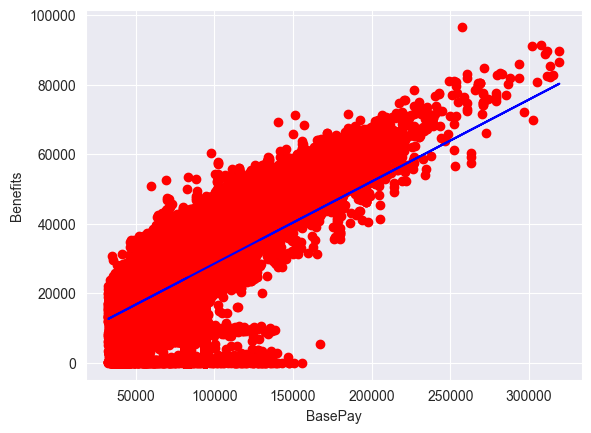

In [460]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[["BasePay"]]
y = df[["Benefits"]]

regressor = LinearRegression()
regressor.fit(X, y)

_pred = regressor.predict(X)

plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel('BasePay')
plt.ylabel('Benefits')
plt.show()

Zbudowano regresję liniową pensji podstawowej i dodatków

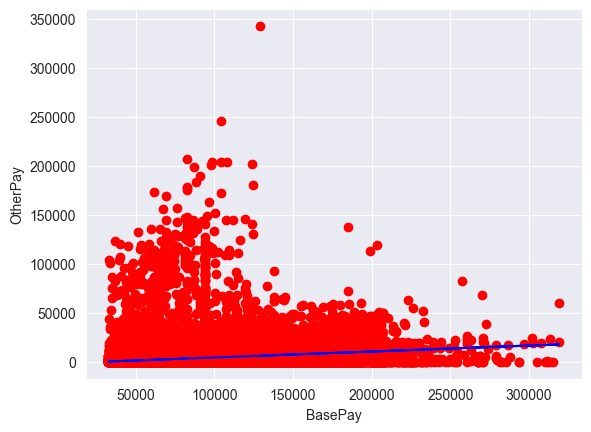

In [461]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[["BasePay"]]
y = df[["OtherPay"]]

regressor = LinearRegression()
regressor.fit(X, y)

_pred = regressor.predict(X)

plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel('BasePay')
plt.ylabel('OtherPay')
plt.show()

Zbudowano regresję liniową pensji podstawowej i płatności za nadgodziny

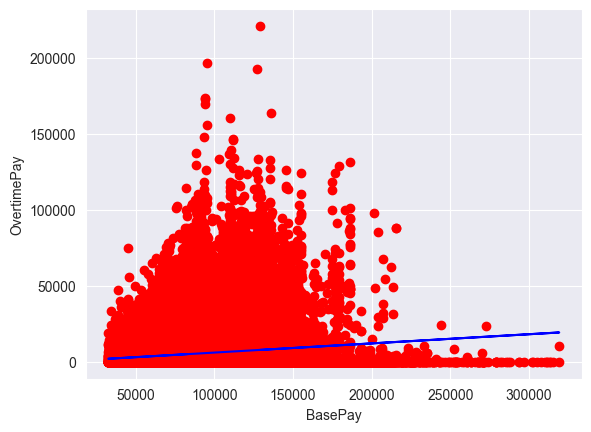

In [462]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[["BasePay"]]
y = df[["OvertimePay"]]

regressor = LinearRegression()
regressor.fit(X, y)

_pred = regressor.predict(X)

plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel('BasePay')
plt.ylabel('OvertimePay')
plt.show()

# Część eksploracyjna

Zaimportowano potrzebne biblioteki, do analizy eksploracyjnej, pandas, seaborn, matplotlib, sklearn

In [463]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor

from sklearn import metrics

Załadowano wyczyszczone dane z pliku CSV. Zbiór danych to plik o wadze ponad 6MB

In [464]:
df = pd.read_csv("../data/SanFrancisco_salary_clean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111879 entries, 0 to 111878
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   JobTitle     111879 non-null  object 
 1   Department   111879 non-null  object 
 2   BasePay      111879 non-null  float64
 3   OvertimePay  111879 non-null  float64
 4   OtherPay     111879 non-null  float64
 5   Benefits     111879 non-null  float64
 6   TotalPay     111879 non-null  float64
dtypes: float64(5), object(2)
memory usage: 6.0+ MB


Sprawdzono brakujące dane. Nie odnotowano brakujących danych


In [465]:
df.isnull().sum()

JobTitle       0
Department     0
BasePay        0
OvertimePay    0
OtherPay       0
Benefits       0
TotalPay       0
dtype: int64

Zbudowano wykres korelacji pomiędzy danymi


/var/folders/r7/kp46shb15q31g148xwp091jh0000gn/T/ipykernel_7408/2012754803.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")


<AxesSubplot: >

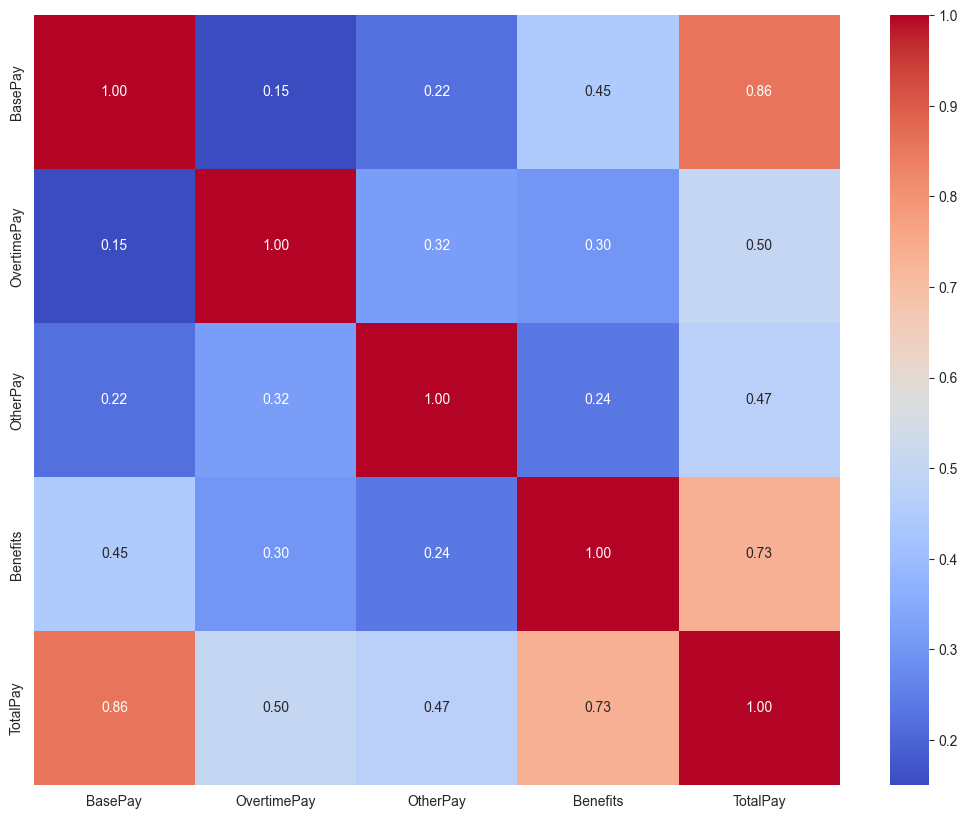

In [466]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

Zbudowano wykres przedstawiający ilość pracowników z wypłatą za nadgodziny w zależności od wydziału

Text(0, 0.5, 'Liczba pracowników z nadgodzinami')

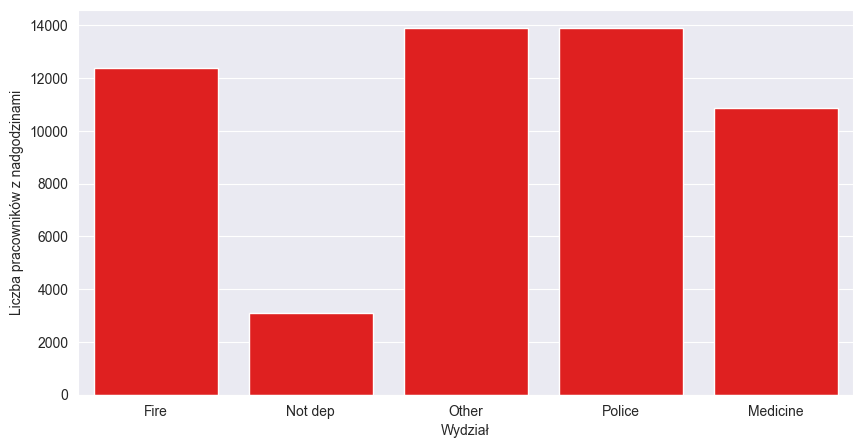

In [467]:
plt.figure(figsize=(10, 5))
g = sns.countplot(x=df["Department"][df["OvertimePay"] > 0], color="Red")
g.set_xlabel("Wydział")
g.set_ylabel("Liczba pracowników z nadgodzinami")

Zbudowano wykres przedstawiający ilość pracowników z premiami w zależności od wydziału

Text(0, 0.5, 'Liczba pracowników z premiami')

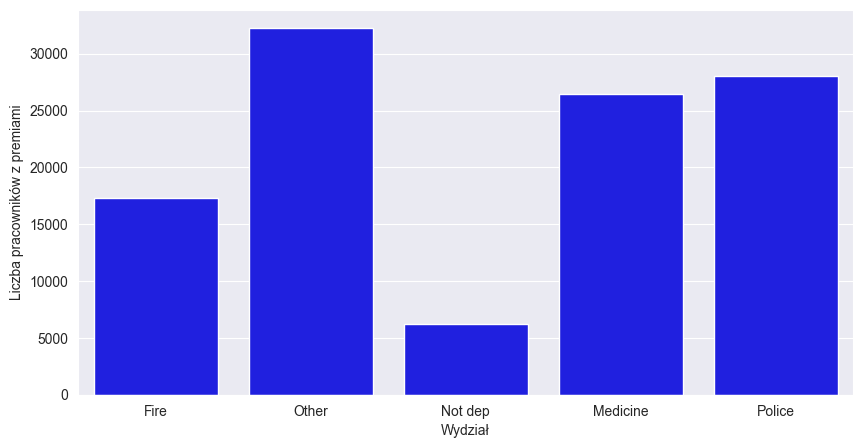

In [468]:
plt.figure(figsize=(10, 5))
g = sns.countplot(x=df["Department"][df["Benefits"] > 0], color="Blue")
g.set_xlabel("Wydział")
g.set_ylabel("Liczba pracowników z premiami")

Przygotowano dane uczące oraz testowe. Dane testowe stanowią 20% całości zbioru danych.

In [469]:
df_copy = pd.DataFrame(df, columns=['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay'])

x = df_copy.drop('Benefits', axis=1)
y = df_copy['Benefits']

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)

Przeskalowano dane przy użyciu StandardScaler

In [470]:
sc = StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

Użyto wielowarstwowego perceptronu do analizy eksploracyjnej danych. Ilość neuronów w warstwach ukrytych to (5, 5), maksymalna ilość iteracji 50

In [471]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(5, 5), random_state=1,
                       max_iter=50, activation='relu',
                       solver='adam')

mlp_reg.fit(trainX_scaled, trainY)

/Users/pp/Library/Caches/pypoetry/virtualenvs/salary-analysis-FGrmVZzj-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(5, 5), max_iter=50, random_state=1)

Dane rzeczywiste różnią się od przewidywanych ze względu na niewielką ilość neuronów

In [472]:
y_pred = mlp_reg.predict(testX_scaled)

df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
37813,49854.93,56395.100561
8264,42520.26,39675.095711
111183,9.22,4600.789186
65938,10767.16,13762.905680
28149,14981.86,16522.237112


Zbudowano wykres przedstawiający dodatki przewidywane oraz rzeczywiste

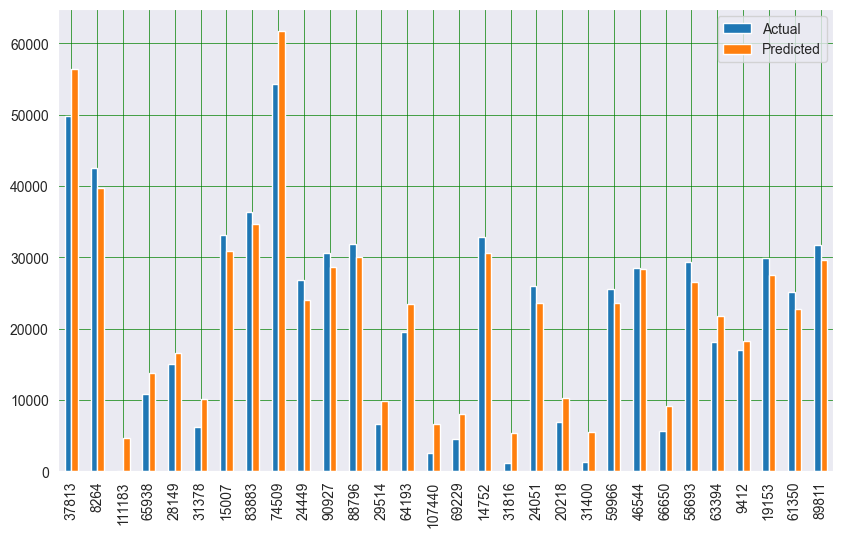

In [473]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar', figsize=(10, 6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Obliczono średni błąd bezwzględny i kwadratowy dla wyników

In [474]:
print('Średni błąd bezwzględny:', metrics.mean_absolute_error(testY, y_pred))
print('Średni błąd kwadratowy:', metrics.mean_squared_error(testY, y_pred))

Średni błąd bezwzględny: 2676.241243734693
Średni błąd kwadratowy: 10967272.064631557


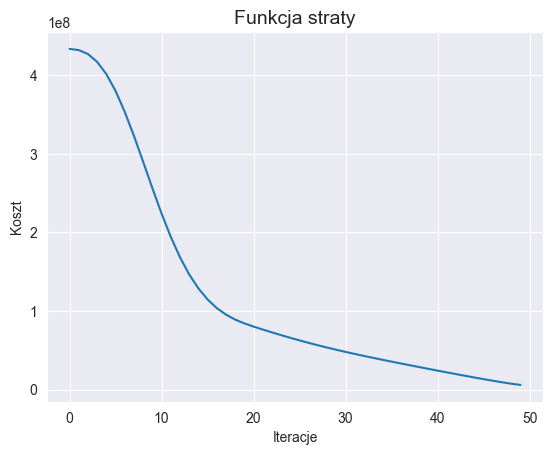

In [475]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Funkcja straty", fontsize=14)
plt.xlabel('Iteracje')
plt.ylabel('Koszt')
plt.show()

Podjęto drugą próbę predykcji z większą ilością neuronów (50, 50) i maksymalną ilością iteracji 50

In [476]:
df_copy = pd.DataFrame(df, columns=['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay'])

x = df_copy.drop('Benefits', axis=1)
y = df_copy['Benefits']

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)
sc = StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)
mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=1,
                       max_iter=50, activation='relu',
                       solver='adam')

mlp_reg.fit(trainX_scaled, trainY)

y_pred = mlp_reg.predict(testX_scaled)

df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

/Users/pp/Library/Caches/pypoetry/virtualenvs/salary-analysis-FGrmVZzj-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


,Actual,Predicted
40392,37976.14,37970.853597
66905,6503.05,6508.136806
85635,29300.47,29312.674343
80138,38344.38,38350.746696
21618,29100.57,29099.243658


Dane rzeczywiste nie różnią się już tak bardzo od przewidywanych jak w pierwszej próbie

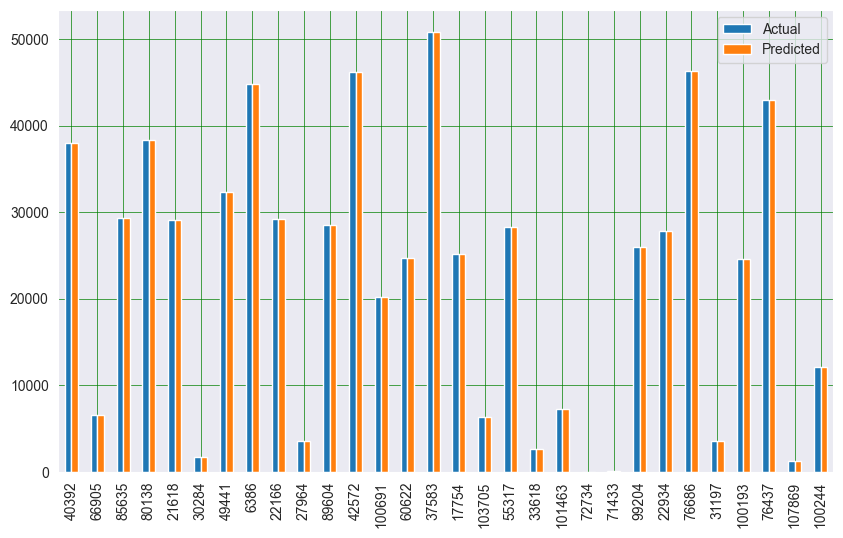

In [477]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar', figsize=(10, 6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [478]:
print('Średni błąd bezwzględny:', metrics.mean_absolute_error(testY, y_pred))
print('Średni błąd kwadratowy:', metrics.mean_squared_error(testY, y_pred))

Średni błąd bezwzględny: 4.132110064894123
Średni błąd kwadratowy: 72.22107343502921


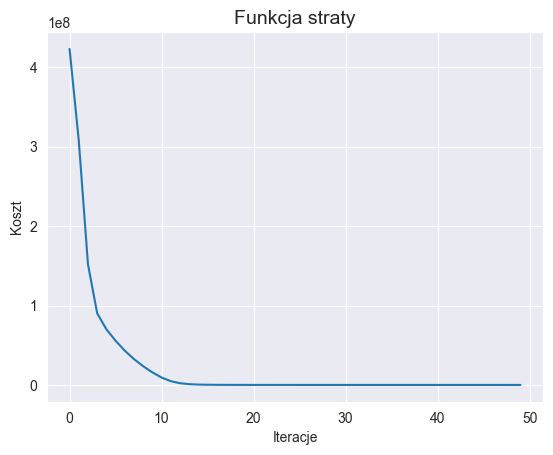

In [479]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Funkcja straty", fontsize=14)
plt.xlabel('Iteracje')
plt.ylabel('Koszt')
plt.show()

## Wnioski

Przeprowadzono analizę statystyczną i eksploracyjną dla przykładowego zbioru danych. Wykorzystano biblioteki języka Python, które są bardzo przyjazne w użyciu i są dobrze opisane w dokumentacji. Rezultaty analizy zobrazowano przy użyciu wykresów biblioteki matplotlib i seaborn.

W części statystycznej dokonano czyszczenia danych, które nie mogły być poprawne. Nie jest możliwe, aby osoba zarabiała mniej niż minimalnie ustalone wynagrodzenie ani nie można posiadać ujemnej premii czy wypłaty za nadgodziny. Dane "brudne" ważyły 12.5 MB, a wyczyszczone dane pozbawione niepotrzebnych kolumn 8.5MB.

W części eksploracyjnej wykorzystano narzędzie jakim jest wielowarstwowy perceptron do stworzenia predykcji premii na podstawie pozostałych parametrów w zbiorze danych. W pierwszym podejściu gdzie zastosowano dwie warstwy ukryte po 5 neuronów predykcja była niedokładna. Następnie zwiększono liczbę neuronów do 50 w każdej warstwie, wyniki okazały się o wiele lepsze, wraz ze wzrostem liczby neuronów można otrzymać dokładniejszą predykcję.